In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/noise2noise

Mounted at /content/drive
/content/drive/MyDrive/noise2noise


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from noise2noise.training import *
from noise2noise.unet import *
from noise2noise.helpers import *
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
import torch.optim as optim


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

training_img, training_target = load_images()
mean, std = to_float_image(training_img).mean(dim=(0,2,3)), to_float_image(training_img).std(dim=(0,2,3))
input_transform = transforms.Compose([ToFloatImage(), transforms.Normalize(mean =mean, std = std)])

target_transform = transforms.Compose([ToFloatImage()])

In [ ]:
train_loader =  DataLoader(
    Noise2NoiseDataset('./dataset/train_data.pkl', transform=input_transform, target_transform=target_transform),
    batch_size = 64,
    num_workers = 2,
    shuffle = True,
    pin_memory = torch.cuda.is_available()
)

test_loader =  DataLoader(
    Noise2NoiseDataset('./dataset/val_data.pkl', transform=input_transform, target_transform=target_transform),
    batch_size = 64,
    num_workers = 2,
    shuffle = True,
    pin_memory = torch.cuda.is_available()
)


In [ ]:
unet = UnetBatchNorm().to(device)
optim = Adam(unet.parameters(), lr=1e-2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=0.01, total_steps=1000)

metric = psnr_metric()
criterion = nn.L1Loss()




train_loss, test_loss, test_metric = train(unet, 
                                           train_loader, 
                                           test_loader, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=scheduler,
                                           lr_steps=1)

100%|██████████| 1000/1000 [01:49<00:00,  9.15it/s]


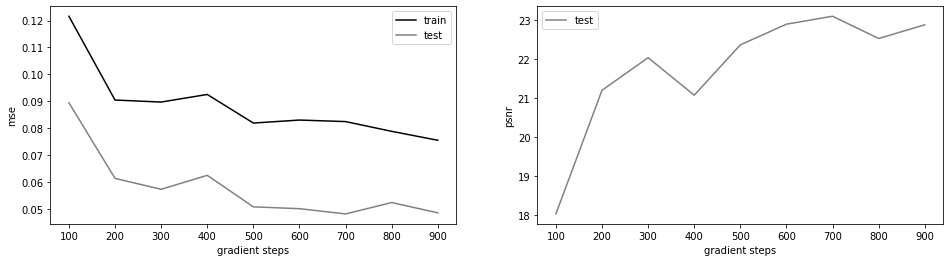

In [ ]:
plot_losses(train_loss, test_loss, test_metric)

psnr :22.54012107849121
psnr :26.927881240844727
psnr :24.344139099121094
psnr :24.94392204284668


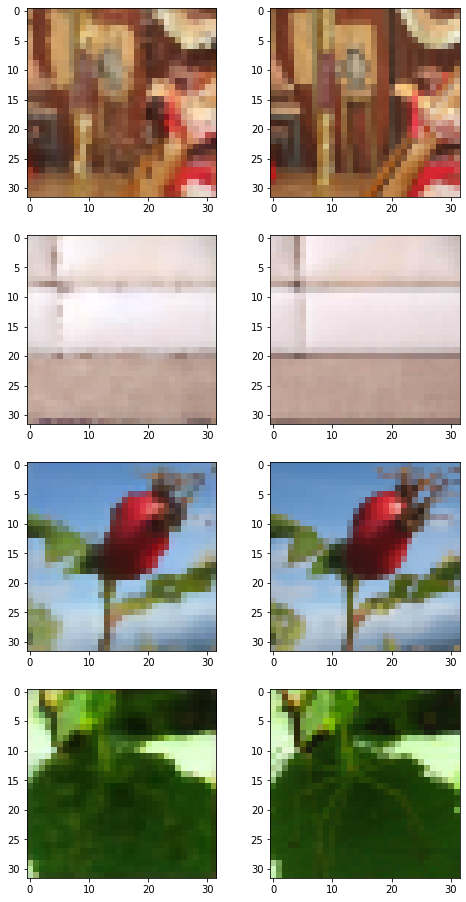

In [ ]:
show_results(unet, test_loader)

In [ ]:
optim = Adam(unet.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=0.001, total_steps=1000)


train_loss, test_loss, test_metric = train(unet, 
                                           train_loader, 
                                           test_loader, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=scheduler,
                                           lr_steps=1)

100%|██████████| 1000/1000 [01:50<00:00,  9.06it/s]


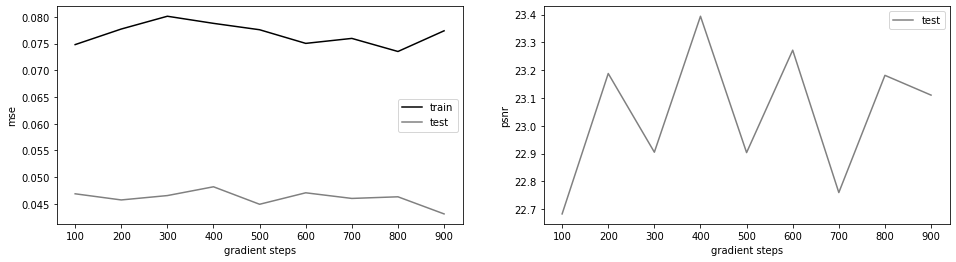

In [ ]:
plot_losses(train_loss, test_loss, test_metric)

psnr :23.627023696899414
psnr :27.898988723754883
psnr :22.97744369506836
psnr :25.075363159179688


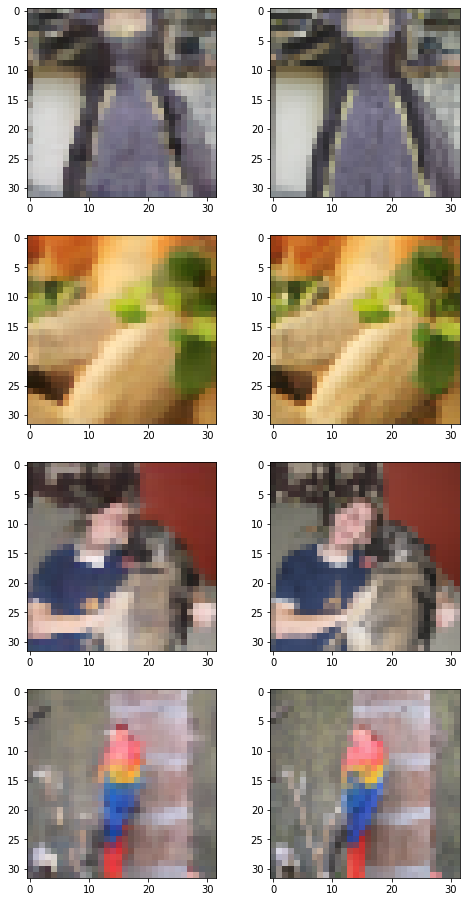

In [ ]:
show_results(unet, test_loader)

In [ ]:
optim = Adam(unet.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=0.0001, total_steps=1000)


train_loss, test_loss, test_metric = train(unet, 
                                           train_loader, 
                                           test_loader, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=scheduler,
                                           lr_steps=1)

 80%|████████  | 800/1000 [01:28<00:20,  9.73it/s]Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
100%|██████████| 1000/1000 [01:50<00:00,  9.02it/s]


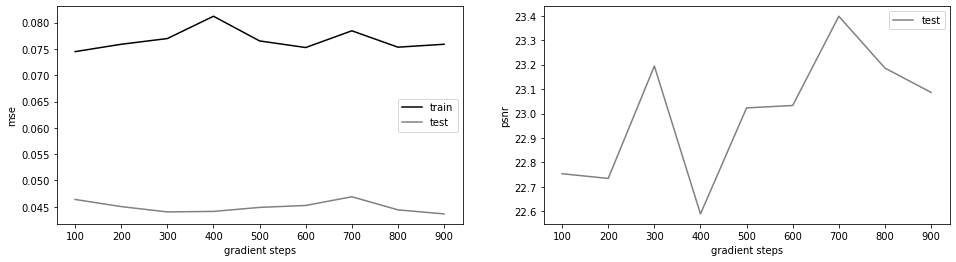

In [ ]:
plot_losses(train_loss, test_loss, test_metric)

In [22]:
import torch.nn.functional as F

unet = UnetBatchNorm().to(device)
optim = Adam(unet.parameters(), lr=3e-3)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=0.01, total_steps=1000)

metric = psnr_metric()
criterion = lambda output, target : F.l1_loss(output, target) + F.mse_loss(output, target)




train_loss, test_loss, test_metric = train(unet, 
                                           train_loader, 
                                           test_loader, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=scheduler,
                                           lr_steps=1)

100%|██████████| 1000/1000 [01:51<00:00,  8.99it/s]


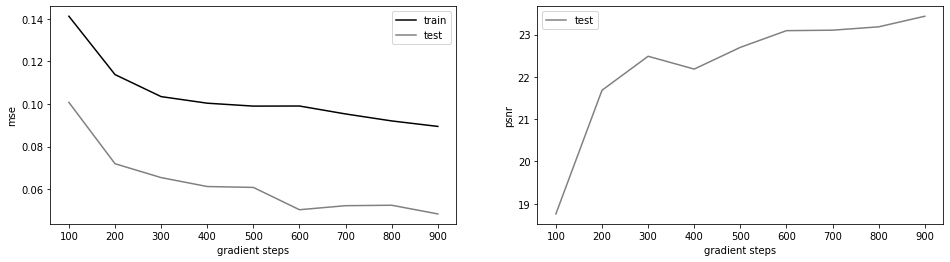

In [23]:
plot_losses(train_loss, test_loss, test_metric)

psnr :27.687397003173828
psnr :24.84804344177246
psnr :19.11424446105957
psnr :21.48255157470703


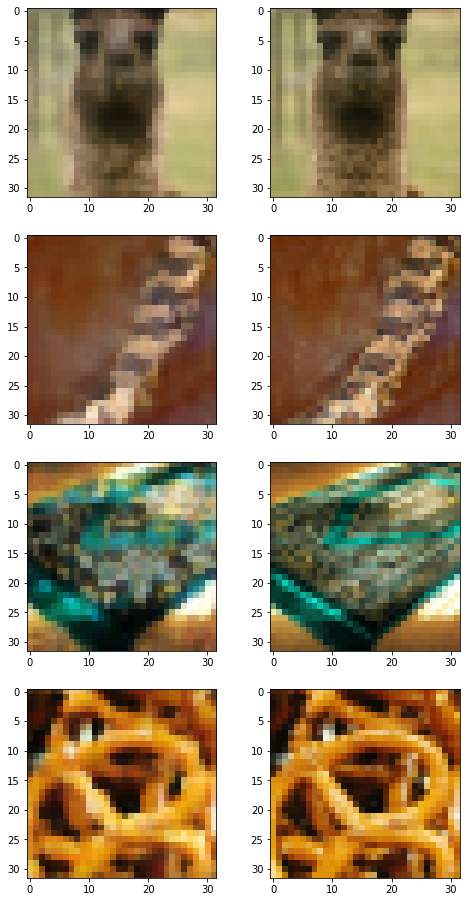

In [24]:
show_results(unet, test_loader)

In [25]:
optim = Adam(unet.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=5e-3, total_steps=1000)

train_loss, test_loss, test_metric = train(unet, 
                                           train_loader, 
                                           test_loader, 
                                           optim, 
                                           criterion, 
                                           metric, 
                                           gradient_steps=1000, 
                                           samples_steps=100,
                                           lr_scheduler=scheduler,
                                           lr_steps=1)

100%|██████████| 1000/1000 [01:51<00:00,  8.99it/s]


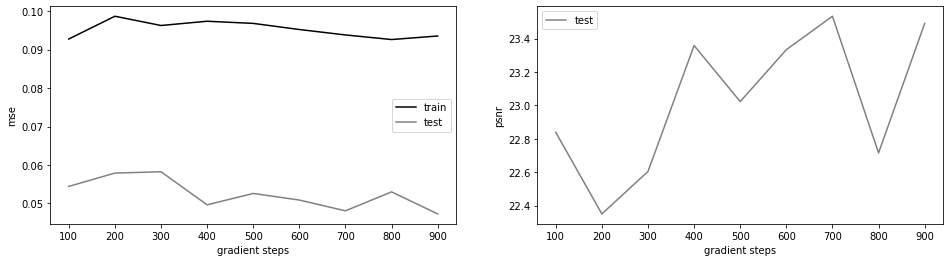

In [26]:
plot_losses(train_loss, test_loss, test_metric)

psnr :20.463693618774414
psnr :19.84894371032715
psnr :23.592914581298828
psnr :18.83926010131836


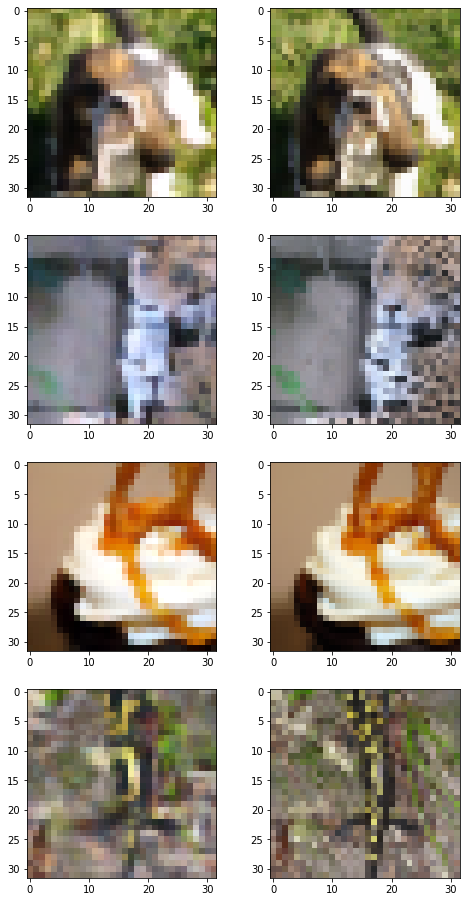

In [29]:
show_results(unet, test_loader)